<img src="https://www.bbva.com/wp-content/uploads/2019/11/machine-learning-1024x629.jpg">

<h1>Machine Learning<span class="tocSkip"></span></h1>



# Import

## Libraries

In [1]:
import src.limpieza as lm
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Dataframe

In [3]:
data = pd.read_csv("data/Machine_learning/casas_train.csv")
data.dtypes

Unnamed: 0              int64
id                      int64
title                  object
subtitle               object
sq_mt_built           float64
sq_mt_useful          float64
n_rooms                 int64
n_bathrooms           float64
floor                 float64
neighborhood_id        object
rent_price              int64
buy_price             float64
house_type_id          object
is_new_development       bool
is_renewal_needed        bool
energy_certificate     object
has_parking              bool
is_exterior              bool
tipo                  float64
barrio_pm2            float64
barrio                 object
distr                  object
e_certificate           int64
dtype: object

# Correlated columns

In [4]:
col = ['sq_mt_built', 'sq_mt_useful','n_rooms', 'n_bathrooms', 'floor', 'rent_price', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate', "buy_price"]
casas = data[col]

In [5]:
casas["is_new_development"] = casas["is_new_development"].astype(int)
casas["is_renewal_needed"] = casas["is_renewal_needed"].astype(int)
casas["has_parking"] = casas["has_parking"].astype(int)
casas["is_exterior"] = casas["is_exterior"].astype(int)

<ipython-input-5-9191f1d2b16f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas["is_new_development"] = casas["is_new_development"].astype(int)
<ipython-input-5-9191f1d2b16f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas["is_renewal_needed"] = casas["is_renewal_needed"].astype(int)
<ipython-input-5-9191f1d2b16f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [6]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,rent_price,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,buy_price
0,60.0,51.00,2,1.0,1.0,816,0,1,0,1,0.0,3.22222,0,1.7000
1,128.0,108.80,3,2.0,0.0,2517,1,0,1,1,0.0,5.00000,6,9.6865
2,89.0,75.65,3,2.0,2.0,1485,0,0,0,0,0.0,5.00000,4,4.2000
3,76.0,66.00,4,1.0,1.0,485,0,0,0,1,0.0,2.00779,0,0.8800
4,142.0,120.70,5,2.0,1.0,1885,0,1,0,1,2.0,4.24658,0,5.9500


<AxesSubplot:>

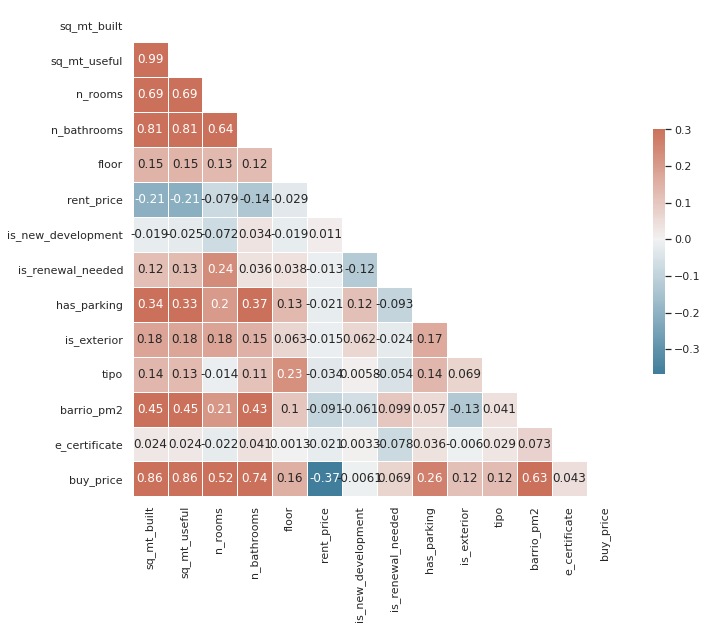

In [7]:
lm.heat_map_triangle(casas)

As I predicted in the cleaning jupyter, the columns useful square meters and built square meters are highly correlated so we must remove one of the two.

In [8]:
col2 = ['sq_mt_built', 'floor','has_parking', 'is_exterior', 'tipo','barrio_pm2', "buy_price"]

<AxesSubplot:>

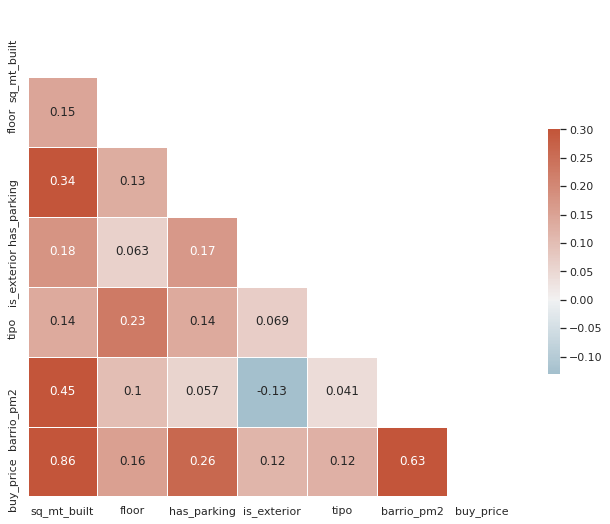

In [9]:
lm.heat_map_triangle(casas[col2])

In [10]:
casas[col2]

,sq_mt_built,floor,has_parking,is_exterior,tipo,barrio_pm2,buy_price
0,60.0,1.0,0,1,0.0,3.22222,1.70000
1,128.0,0.0,1,1,0.0,5.00000,9.68650
2,89.0,2.0,0,0,0.0,5.00000,4.20000
3,76.0,1.0,0,1,0.0,2.00779,0.88000
4,142.0,1.0,0,1,2.0,4.24658,5.95000
...,...,...,...,...,...,...,...
15768,138.0,3.0,1,1,0.0,2.57887,5.23127
15769,110.0,3.0,0,1,0.0,5.00000,5.99000
15770,270.0,1.0,1,1,0.0,4.24749,8.45000
15771,137.0,5.0,0,1,0.0,4.45618,6.60000


# Best columns

In [11]:
results = smf.ols("buy_price ~ sq_mt_built + floor + has_parking + is_exterior + tipo + barrio_pm2", data = casas[col2]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              buy_price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 1.216e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        17:49:12   Log-Likelihood:                -37350.
No. Observations:               15773   AIC:                         7.471e+04
Df Residuals:                   15766   BIC:                         7.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.2323      0.093    -66.668      0.000      -6.415      -6.049
sq_mt_built     0.0511      0.000    173.128      0.000       0.051       0.052
floor           0.0515      0.010      4.958      0.000       0.031       0.072
has_parking    -0.0711      0.047     -1.499      0.134      -0.164       0.022
is_exterior     0.5541      0.074      7.460      0.000       0.408       0.700
tipo            0.0965      0.045      2.139      0.032       0.008       0.185
barrio_pm2      1.2740      0.016     80.494      0.000       1.243       1.305
==============================================================================
Omnibus:                    14304.832   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2024003.075
Skew:                           3.854   Prob(JB):                         0.00
Kurtosis:                      57.957   Cond. No.                         827.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
col3 = ['sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_new_development', 'is_renewal_needed','has_parking', 'is_exterior', 'tipo','barrio_pm2', 'e_certificate', "buy_price"]

# Train-Test-Split

In [13]:
modelo = casas[col]

In [14]:
X = modelo.drop("buy_price", axis=1)
y = modelo.buy_price

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.shape

(12618, 13)

In [17]:
X_test.shape

(3155, 13)

In [18]:
y_train.shape

(12618,)

In [19]:
y_test.shape

(3155,)

# Train models

In [20]:
models = {"ridge":Ridge(),
         "lasso":Lasso(),
         "sgd":SGDRegressor(),
         "KNN":KNeighborsRegressor(),
         "gradient":GradientBoostingRegressor(),
          "Rfr" : RandomForestRegressor(),
          "Decision Tree" : DecisionTreeRegressor(max_depth=7),
          #"XGBoost" : XGBRegressor(),
          
         }

In [21]:

dicc= {}

for name, model in models.items():
    dicc_metrics = {}
    
    print(f"Trainning model -----> {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dicc_metrics["MAE"] = metrics.mean_absolute_error(y_test, y_pred)
    dicc_metrics["MSE"] = metrics.mean_squared_error(y_test,y_pred)
    dicc_metrics["RMSE"] = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    dicc_metrics["R2_score"] = metrics.r2_score(y_true=y_test,y_pred=y_pred)
    
    dicc[name] = dicc_metrics
    
    print("Model finished")
metricas = pd.DataFrame(dicc)
metricas

Trainning model -----> ridge
Model finished
Trainning model -----> lasso
Model finished
Trainning model -----> sgd
Model finished
Trainning model -----> KNN
Model finished
Trainning model -----> gradient
Model finished
Trainning model -----> Rfr
Model finished
Trainning model -----> Decision Tree
Model finished


,ridge,lasso,sgd,KNN,gradient,Rfr,Decision Tree
MAE,1.336250,1.361190,6.710386e+18,0.147714,0.283633,0.084879,0.221913
MSE,5.318996,6.269521,4.221920e+39,0.485272,0.479743,0.277083,0.509615
RMSE,2.306295,2.503901,6.497631e+19,0.696615,0.692635,0.526386,0.713874
R2_score,0.872059,0.849196,-1.015521e+38,0.988327,0.988460,0.993335,0.987742


Best models to predict the diamond price are **###** and **###** 

# Max depth

In [23]:
celda stop


SyntaxError: invalid syntax (<ipython-input-23-f885828ffb70>, line 1)

In [ ]:
results = []

for depth in range(1, 30):
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    result = {
        "depth": depth,
        "train_error": metrics.mean_squared_error(y_train, model.predict(X_train)),
        "test_error": metrics.mean_squared_error(y_test, model.predict(X_test))
    }
    
    results.append(result)

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot(results_df.depth, results_df.train_error, label="train error")
plt.plot(results_df.depth, results_df.test_error, label="test error")
plt.legend()

# Parameter Tuning
Now that we have found the most efficient model, let's try the different `hyperparameters` to improve it.



In [24]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        "max_depth": [6,7,8],
        "max_features": [.1,.25,.5,0.65,.75,0.8,.9,1],
        "min_samples_split": [2,3,5,10]
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [25]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.1, min_samples_split=2; total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.3s
[CV 2/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.3s
[CV 3/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.3s
[CV 4/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.3s
[CV 5/5] END max_depth=6, max_features=0.1, min_samples_split=3; total time=   0.3s
[CV 1/5] END max_depth=6, max_features=0.1, min_samples_split=5; total time=   0.3s
[CV 2/5] END m

[CV 2/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.9s
[CV 3/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.9s
[CV 4/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.9s
[CV 5/5] END max_depth=6, max_features=0.75, min_samples_split=10; total time=   0.9s
[CV 1/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   1.0s
[CV 2/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   1.0s
[CV 3/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   1.0s
[CV 4/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   1.0s
[CV 5/5] END max_depth=6, max_features=0.8, min_samples_split=2; total time=   1.0s
[CV 1/5] END max_depth=6, max_features=0.8, min_samples_split=3; total time=   1.0s
[CV 2/5] END max_depth=6, max_features=0.8, min_samples_split=3; total time=   1.0s
[CV 3/5] END max_depth=6, max_features=0.8, min_samples_split=3; tot

[CV 5/5] END max_depth=7, max_features=0.25, min_samples_split=5; total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.5s
[CV 2/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.5s
[CV 3/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.5s
[CV 4/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.5s
[CV 5/5] END max_depth=7, max_features=0.25, min_samples_split=10; total time=   0.5s
[CV 1/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.8s
[CV 2/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.8s
[CV 3/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.8s
[CV 4/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.8s
[CV 5/5] END max_depth=7, max_features=0.5, min_samples_split=2; total time=   0.8s
[CV 1/5] END max_depth=7, max_features=0.5, min_samples_split=3; 

[CV 2/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   1.2s
[CV 3/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   1.2s
[CV 4/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   1.3s
[CV 5/5] END max_depth=7, max_features=0.9, min_samples_split=5; total time=   1.3s
[CV 1/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   1.4s
[CV 2/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   1.4s
[CV 3/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   1.4s
[CV 4/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   1.3s
[CV 5/5] END max_depth=7, max_features=0.9, min_samples_split=10; total time=   1.3s
[CV 1/5] END max_depth=7, max_features=1, min_samples_split=2; total time=   0.3s
[CV 2/5] END max_depth=7, max_features=1, min_samples_split=2; total time=   0.3s
[CV 3/5] END max_depth=7, max_features=1, min_samples_split=2; total time= 

[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=3; total time=   1.0s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   1.0s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   1.0s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   1.1s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   1.0s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=5; total time=   1.1s
[CV 1/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   1.0s
[CV 2/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   1.0s
[CV 3/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   1.0s
[CV 4/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   1.0s
[CV 5/5] END max_depth=8, max_features=0.65, min_samples_split=10; total time=   1.0s
[CV 1/5] END max_depth=8, max_features=0.75, min_samples_spl

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 7, 8],
                         'max_features': [0.1, 0.25, 0.5, 0.65, 0.75, 0.8, 0.9,
                                          1],
                         'min_samples_split': [2, 3, 5, 10]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [26]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_max_features', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]
grid_search_results["diferencia"] = grid_search_results["mean_test_score"] - grid_search_results["mean_train_score"]

In [27]:
grid_search_results.sort_values("mean_test_score", ascending=False).head(10)

,param_max_depth,param_max_features,param_min_samples_split,mean_test_score,mean_train_score,diferencia
88,8,0.9,2,-0.277557,-0.124313,-0.153244
89,8,0.9,3,-0.279451,-0.131455,-0.147996
85,8,0.8,3,-0.284674,-0.137660,-0.147014
90,8,0.9,5,-0.285583,-0.149872,-0.135711
84,8,0.8,2,-0.287870,-0.130772,-0.157098
80,8,0.75,2,-0.294367,-0.138826,-0.155542
86,8,0.8,5,-0.297785,-0.156213,-0.141572
81,8,0.75,3,-0.297855,-0.142763,-0.155092
57,7,0.9,3,-0.305589,-0.177974,-0.127615
56,7,0.9,2,-0.308566,-0.175631,-0.132935


In [28]:
best_tree = gs.best_estimator_

In [29]:
best_tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=0.9)

In [30]:
metrics.mean_squared_error(best_tree.predict(X_test),y_test)

0.27524448331703966

In [31]:
np.sqrt(metrics.mean_squared_error(best_tree.predict(X_test),y_test)).round(5)*100_000

52464.0

In [34]:
casas.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,rent_price,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,buy_price
0,60.0,51.00,2,1.0,1.0,816,0,1,0,1,0.0,3.22222,0,1.7000
1,128.0,108.80,3,2.0,0.0,2517,1,0,1,1,0.0,5.00000,6,9.6865
2,89.0,75.65,3,2.0,2.0,1485,0,0,0,0,0.0,5.00000,4,4.2000
3,76.0,66.00,4,1.0,1.0,485,0,0,0,1,0.0,2.00779,0,0.8800
4,142.0,120.70,5,2.0,1.0,1885,0,1,0,1,2.0,4.24658,0,5.9500


In [35]:
modelo = casas[col]
train = modelo.drop("buy_price", axis=1)


y_pred = best_tree.predict(train)

In [36]:
modelo["predict"] = y_pred
modelo.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,rent_price,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,buy_price,predict
0,60.0,51.00,2,1.0,1.0,816,0,1,0,1,0.0,3.22222,0,1.7000,1.644469
1,128.0,108.80,3,2.0,0.0,2517,1,0,1,1,0.0,5.00000,6,9.6865,9.659386
2,89.0,75.65,3,2.0,2.0,1485,0,0,0,0,0.0,5.00000,4,4.2000,4.186553
3,76.0,66.00,4,1.0,1.0,485,0,0,0,1,0.0,2.00779,0,0.8800,0.985051
4,142.0,120.70,5,2.0,1.0,1885,0,1,0,1,2.0,4.24658,0,5.9500,5.833083


In [39]:
modelo["diferencia"] = round(np.sqrt((modelo["buy_price"] - modelo["predict"])**2),2)

In [40]:
modelo.sort_values("diferencia", ascending=False).head(500)

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,floor,rent_price,is_new_development,is_renewal_needed,has_parking,is_exterior,tipo,barrio_pm2,e_certificate,buy_price,predict,diferencia
8537,138.0,117.30,3,2.0,3.0,452,0,0,0,1,0.0,8.39243,6,13.5000,4.274787,9.23
10680,137.0,116.45,3,2.0,0.0,1451,1,0,1,1,0.0,4.67753,0,12.6000,4.948387,7.65
5552,450.0,382.50,4,5.0,4.0,-29833743,0,0,0,1,0.0,6.73932,0,85.0000,77.482125,7.52
13095,287.0,243.95,2,2.0,0.5,1416,0,1,0,1,0.0,5.49217,0,3.9000,10.991472,7.09
1545,170.0,144.50,3,3.0,2.0,1186,0,0,0,1,1.0,4.01576,0,12.8790,6.147593,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15126,147.0,124.95,3,2.0,1.0,1923,1,0,1,1,2.0,3.60713,0,6.1150,6.806758,0.69
14559,218.0,185.30,2,2.0,0.0,2495,1,0,1,1,0.0,4.80769,0,10.1990,9.504393,0.69
1672,237.0,201.45,5,3.0,4.0,2495,0,0,1,1,0.0,4.09870,2,10.2000,9.511155,0.69
13207,730.0,523.00,8,7.0,5.0,-5065416,0,0,1,1,0.0,6.56427,3,56.5000,57.191000,0.69
